In [12]:


import math
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.datasets import load_iris 

# data load
iris = load_iris()

/home/ari/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
x = iris.data
y = iris.target

In [11]:
print(x[:5])
print(y[:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0]


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
D_train = xgb.DMatrix(x_train, label=y_train)
D_test = xgb.DMatrix(x_test, label=y_test)

In [15]:
param = {
    'eta': 0.3,
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 3
    }
steps = 20

In [16]:
model = xgb.train(param, D_train, steps)

from sklearn.metrics import accuracy_score, precision_score, recall_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))

[14:08:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.9666666666666667
Precision = 0.9666666666666667
Recall = 0.9666666666666667


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

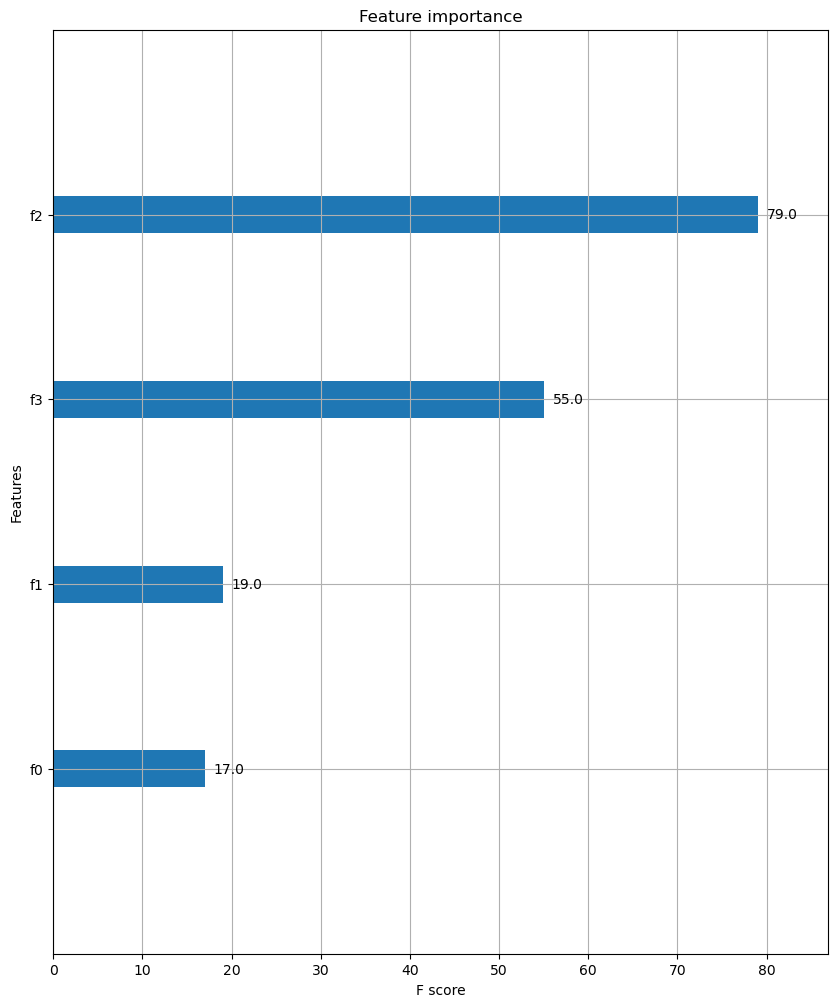

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
xgb.plot_importance(model, max_num_features=50, ax=ax)

In [19]:
features = iris.data    # shape = (150, 4)
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

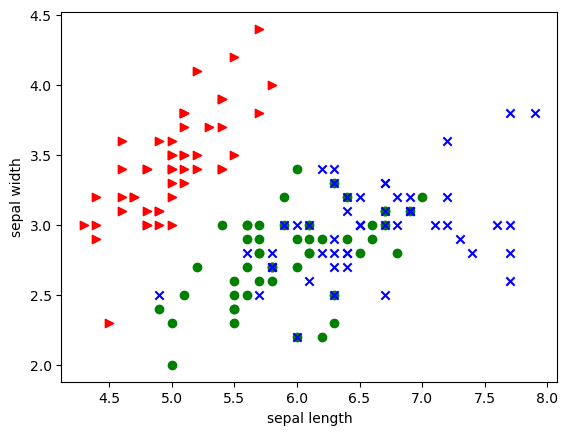

In [20]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
    plt.scatter(features[target == t, 0],   # sepal length
                features[target == t, 1],   # sepal width
                marker = marker,
                c = c)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")

In [ ]:
# http://theyoonicon.com/scikit-learn%EC%9D%98-iris-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0/